In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import RandomOverSampler

# Data exploration

In [42]:
df = pd.read_csv("data.csv")

In [43]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Classifying the diagnosis wether it is M = malignant or B = Beningn

In [44]:
# convert M to 1
df["diagnosis"] = (df["diagnosis"] == "M").astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Understand the shape of the data

In [46]:
cols = [cname for cname in df.columns]

In [47]:
len(cols)

33

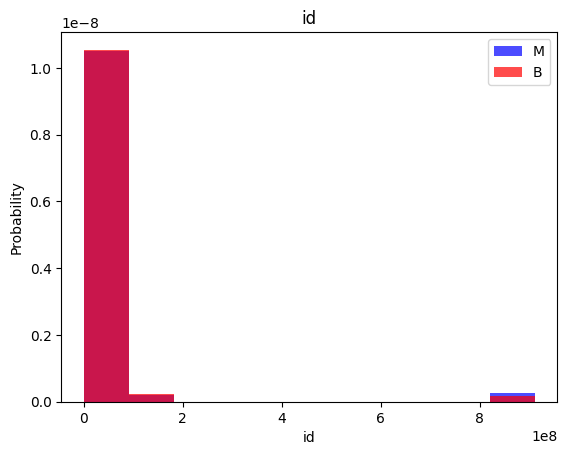

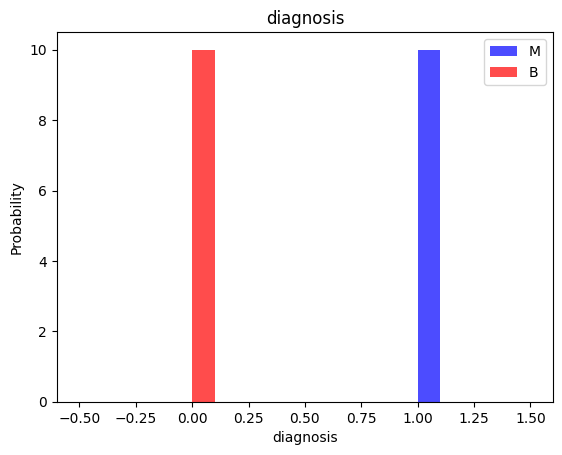

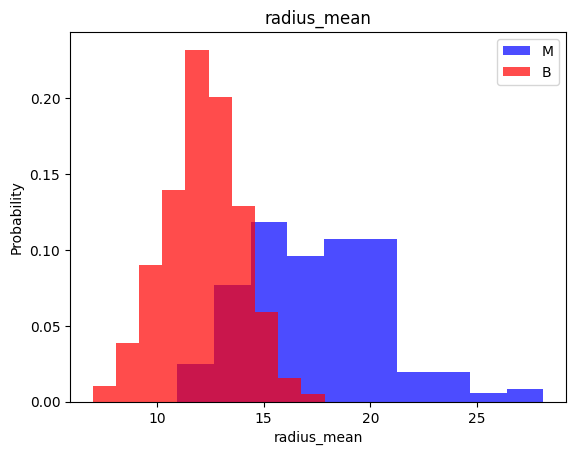

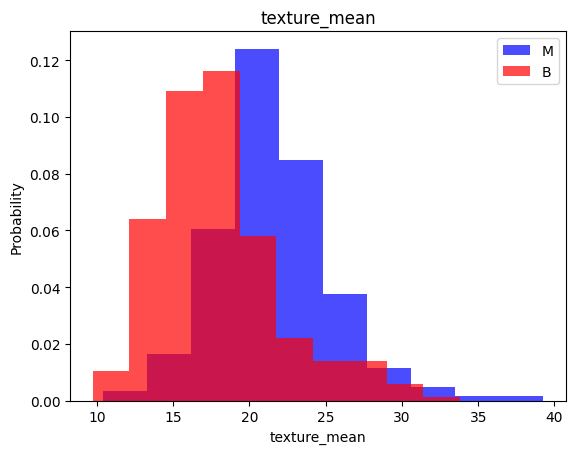

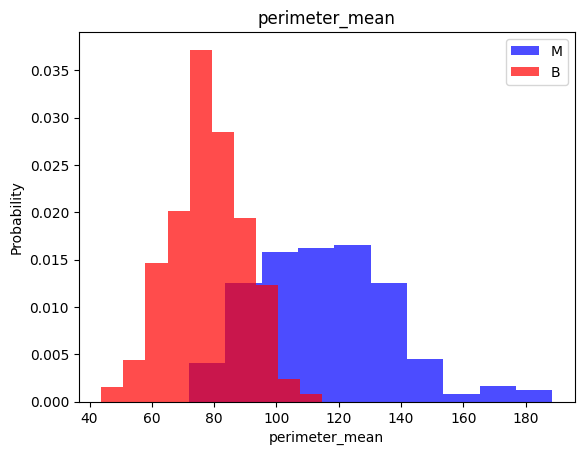

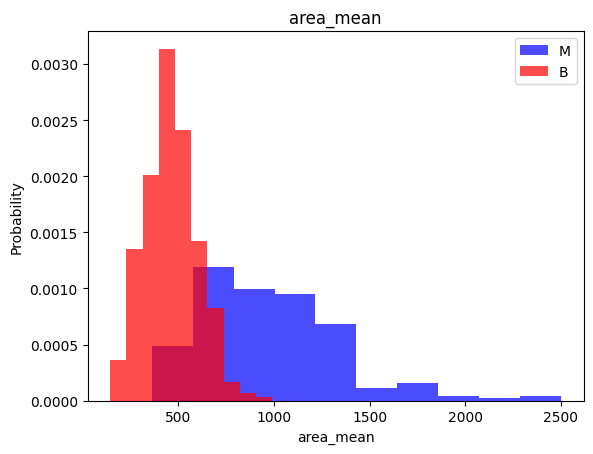

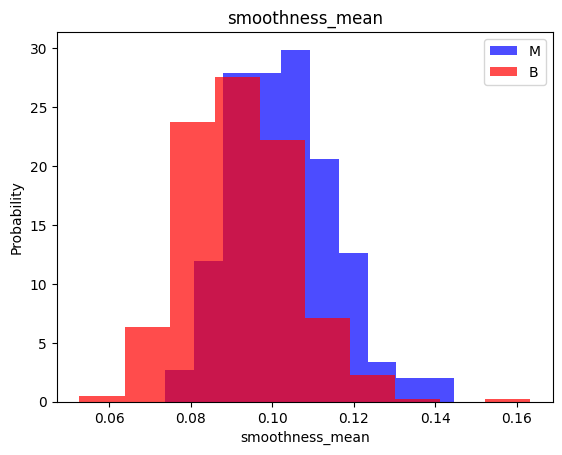

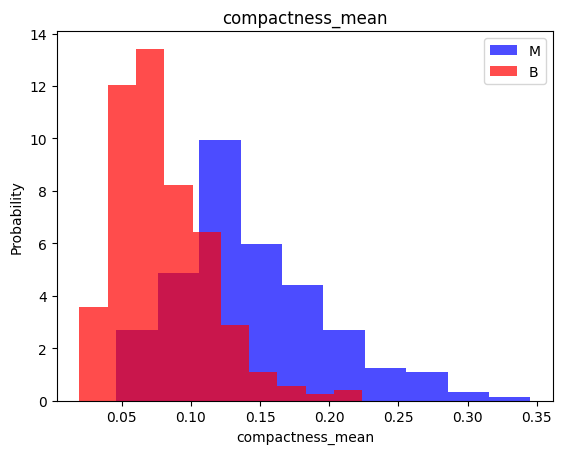

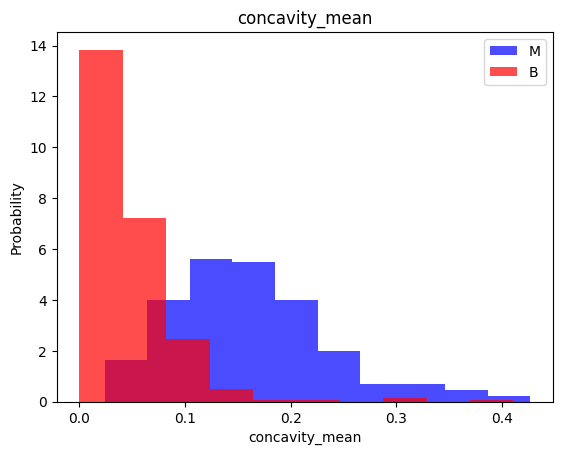

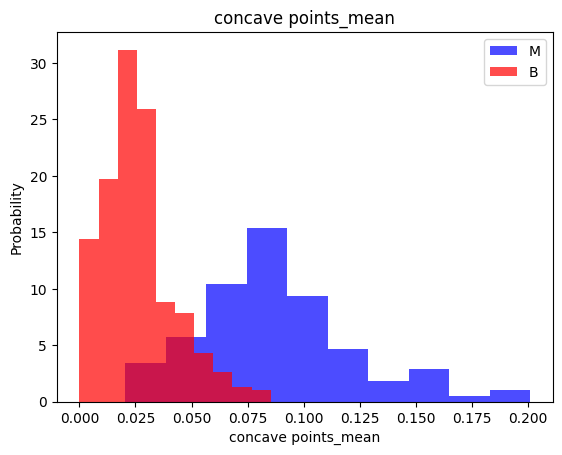

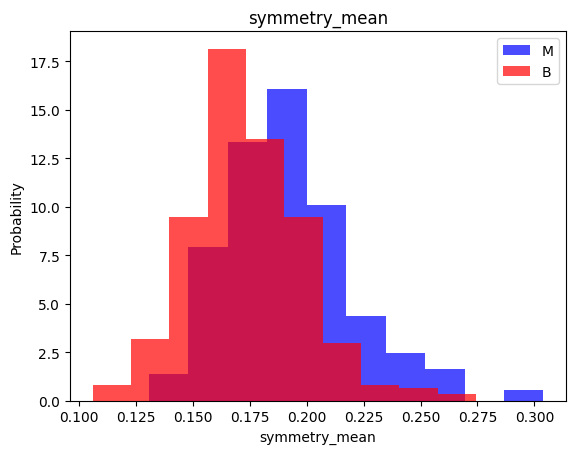

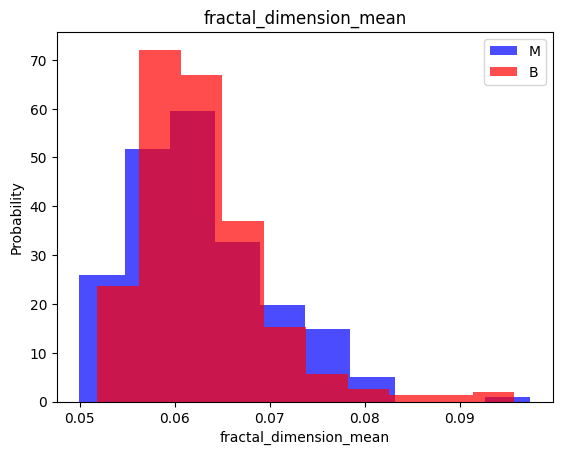

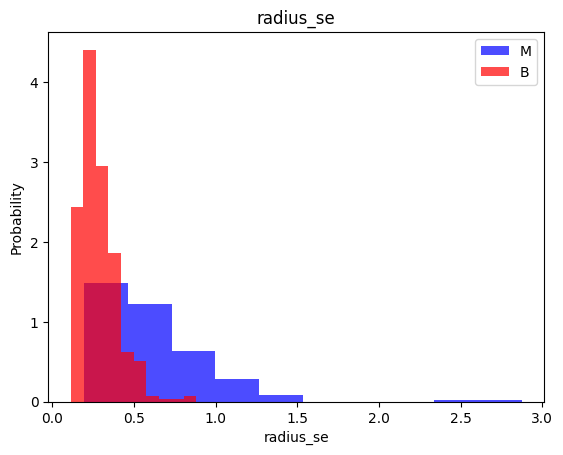

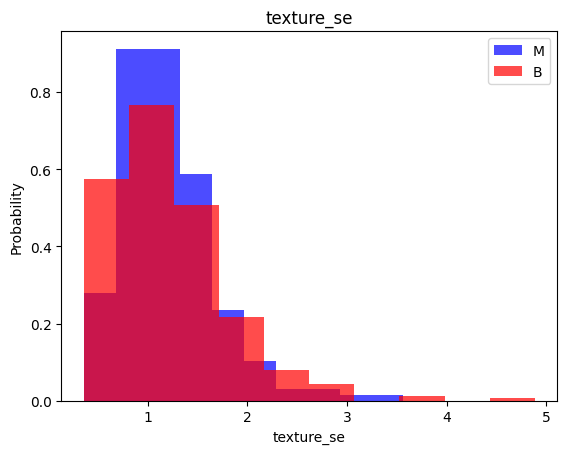

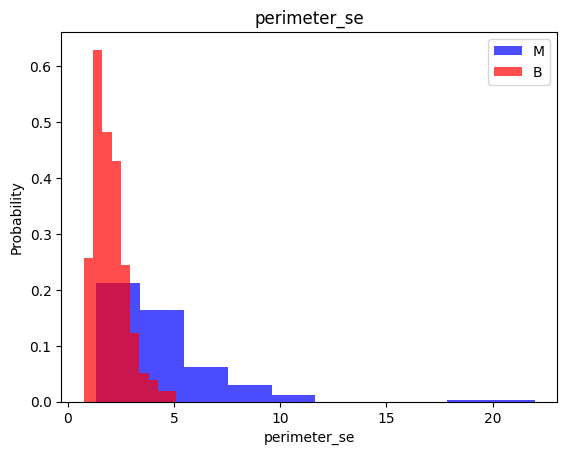

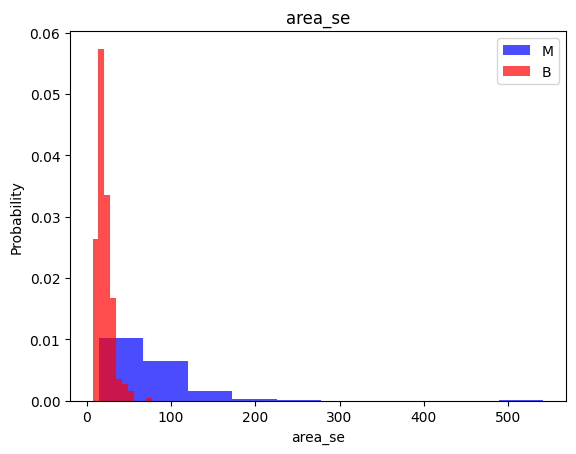

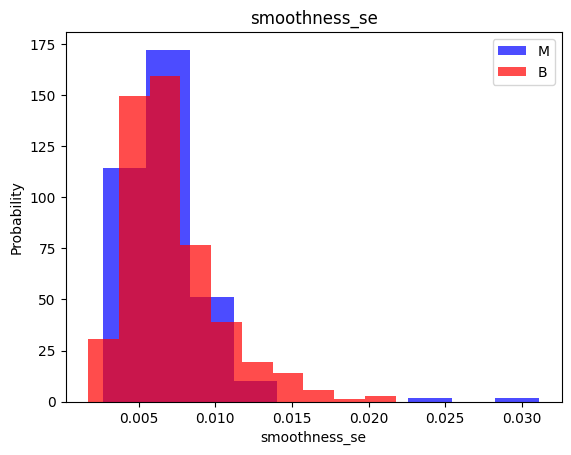

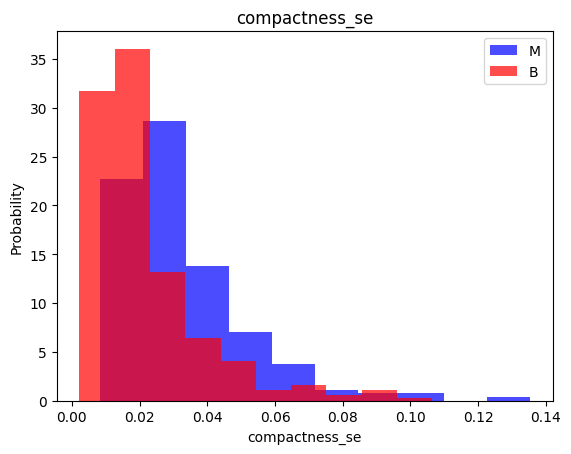

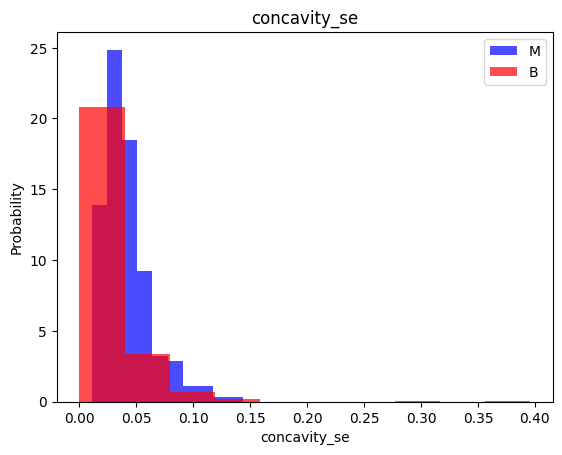

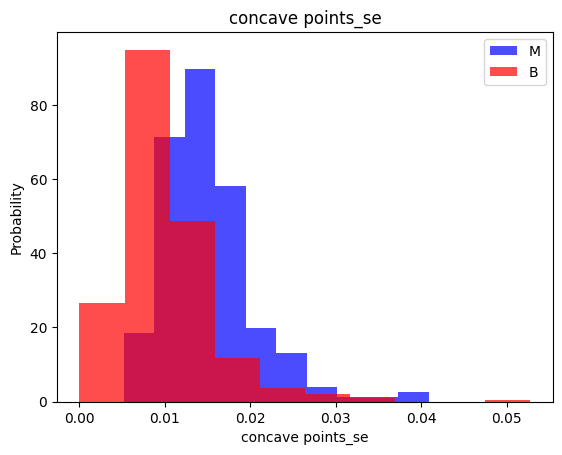

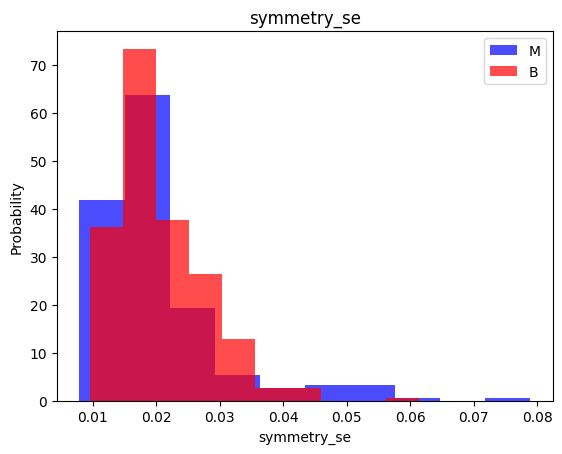

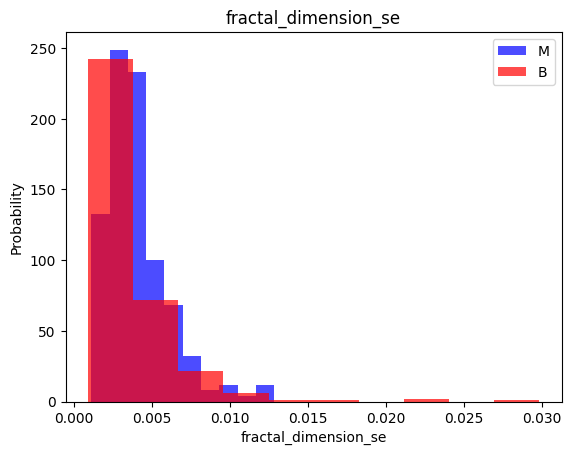

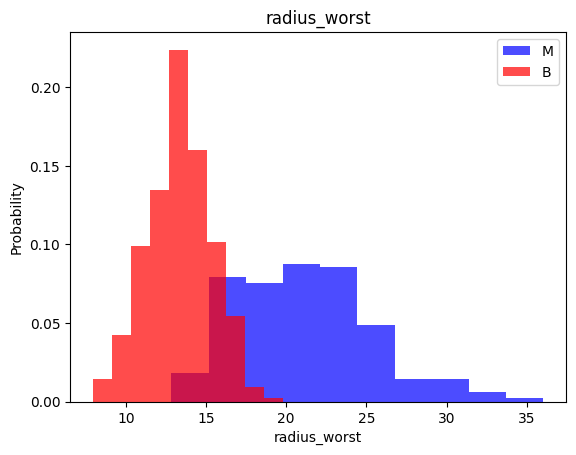

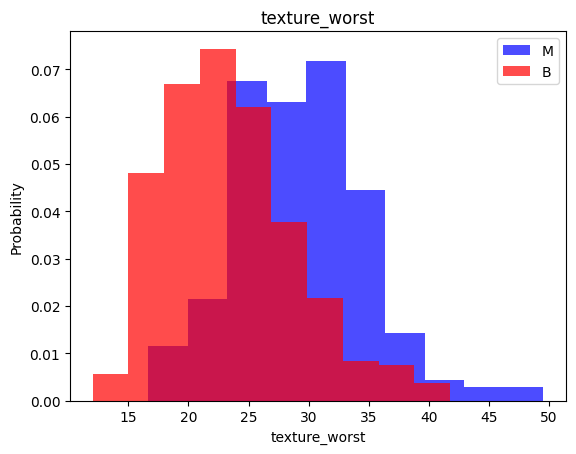

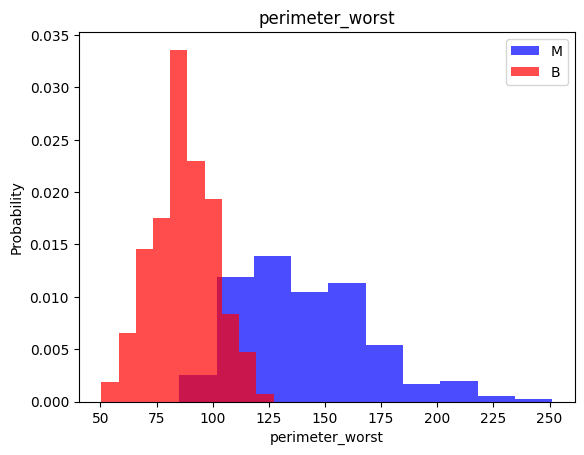

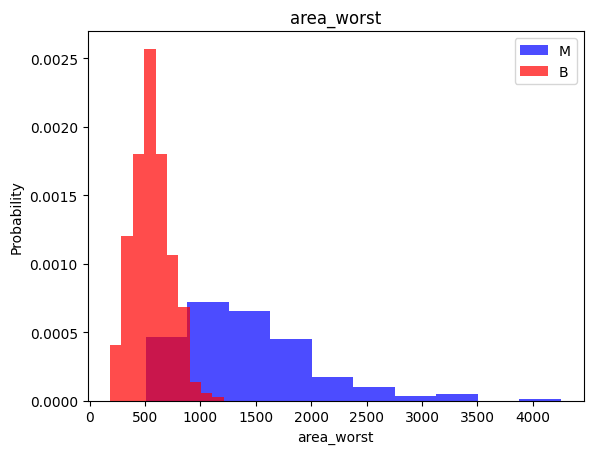

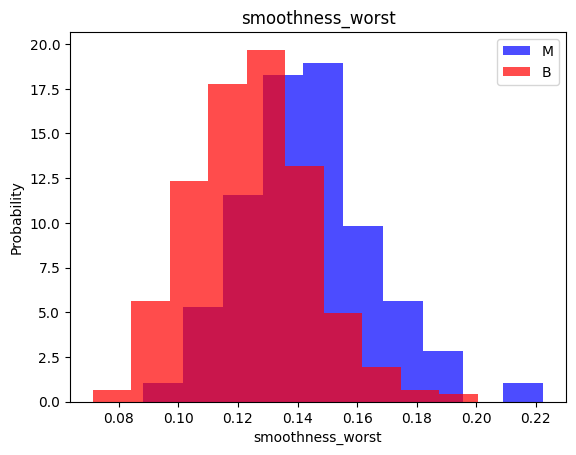

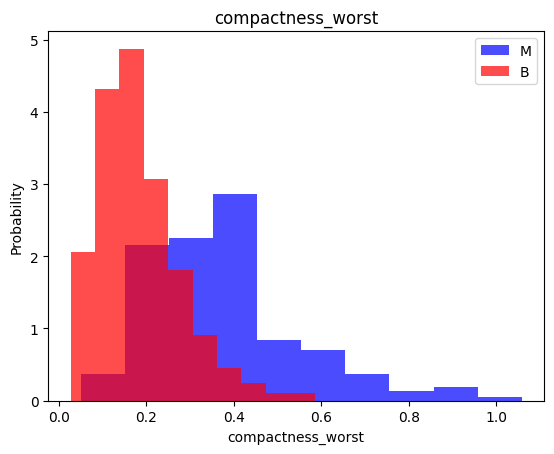

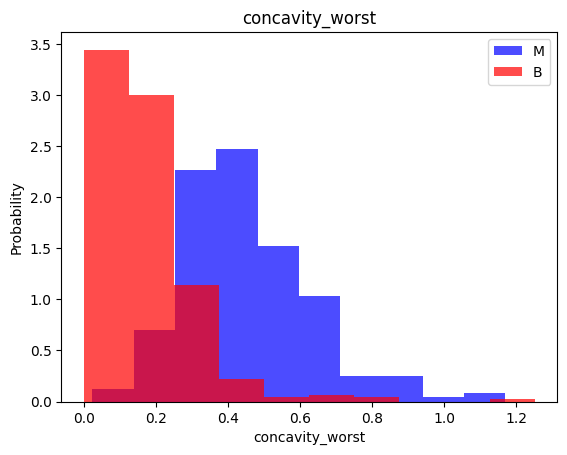

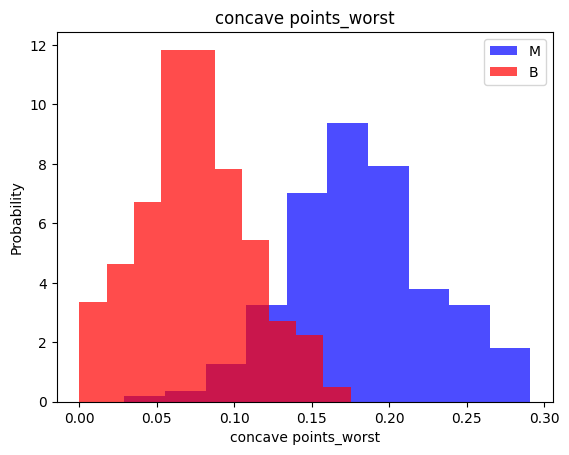

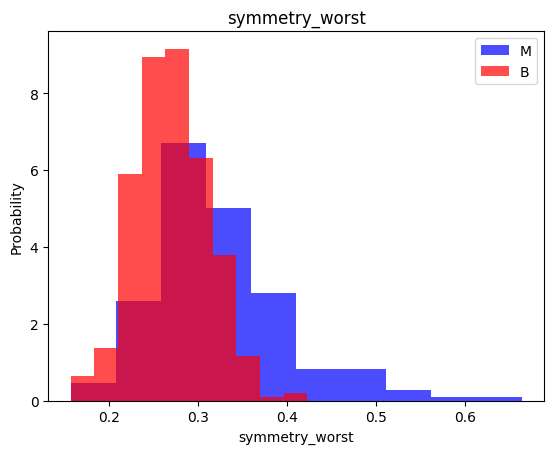

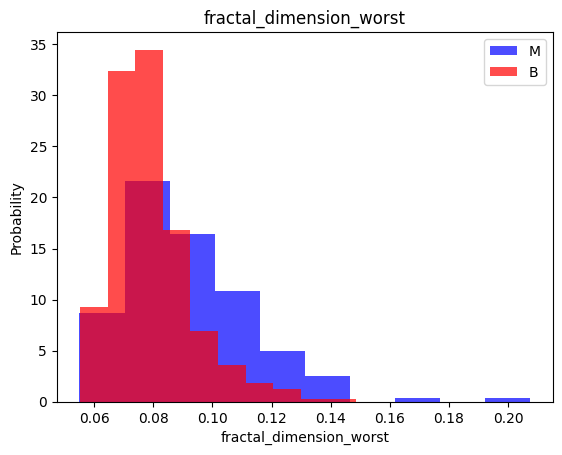

In [48]:
## plot the 10 different feautres to a histogram
for label in cols[: -1]:
    plt.hist(df[df["diagnosis"] == 1][label], color = 'blue', label = 'M', alpha = 0.7, density = True)
    plt.hist(df[df["diagnosis"]== 0][label], color = 'red', label = 'B', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Data Cleaning

In [49]:
# Dropping irrelevant columns
df.drop("id", axis = 1, inplace = True)
df.drop("Unnamed: 32", axis = 1, inplace = True)

In [50]:
# Separating the target feature and dropping it
y = df["diagnosis"]
df.drop("diagnosis", axis = 1, inplace = True)

In [81]:
numeric_transformer = Pipeline([
    ('scaler', Normalizer())    # Standardize numeric features
])


pipeline = Pipeline(
    steps = [
        ("preprocessor", numeric_transformer)
    ]
)

In [82]:
cols = [cname for cname in df.columns]
X = df[cols]

In [83]:
X_pp = pipeline.fit_transform(X)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_pp, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

# Model Building

## Base Model (RandomForestClassifier)

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [102]:
model_1 = RandomForestClassifier(n_estimators = 100, max_depth= 3)
model_1.fit(X_train, y_train)
pred = model_1.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## XGBClassifier

In [103]:
model_2 = XGBClassifier()
model_2.fit(X_train, y_train)
pred = model_2.predict(X_test)


print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [117]:

# Create an XGBClassifier
model_3 = XGBClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001, 0.05]
}

# Create a GridSearchCV object with the model and parameter grid
grid_search = GridSearchCV(model_3, param_grid=param_grid, cv=4)

# Fit the grid search object to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [118]:
best_params

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

In [119]:
best_score

0.951618537494178

In [120]:
best_model = XGBClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 300)

best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)


print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

